# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('previsao_de_renda.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
df_qualitativa = df.select_dtypes(exclude=['int64','float64'])
df_qualitativa['data_ref'] = pd.to_datetime(df_qualitativa['data_ref'])
df_qualitativa['data_ref'] = df_qualitativa['data_ref'].dt.strftime('%m-%y')
df_qualitativa

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,01-15,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,01-15,M,True,True,Empresário,Secundário,Casado,Casa,False
2,01-15,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,01-15,F,True,False,Empresário,Secundário,Casado,Casa,False
4,01-15,M,False,False,Assalariado,Secundário,Casado,Casa,False
...,...,...,...,...,...,...,...,...,...
14995,03-16,M,True,True,Assalariado,Secundário,Casado,Casa,False
14996,03-16,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False
14997,03-16,F,True,True,Assalariado,Secundário,Casado,Casa,False
14998,03-16,F,False,True,Servidor público,Superior completo,Casado,Casa,False


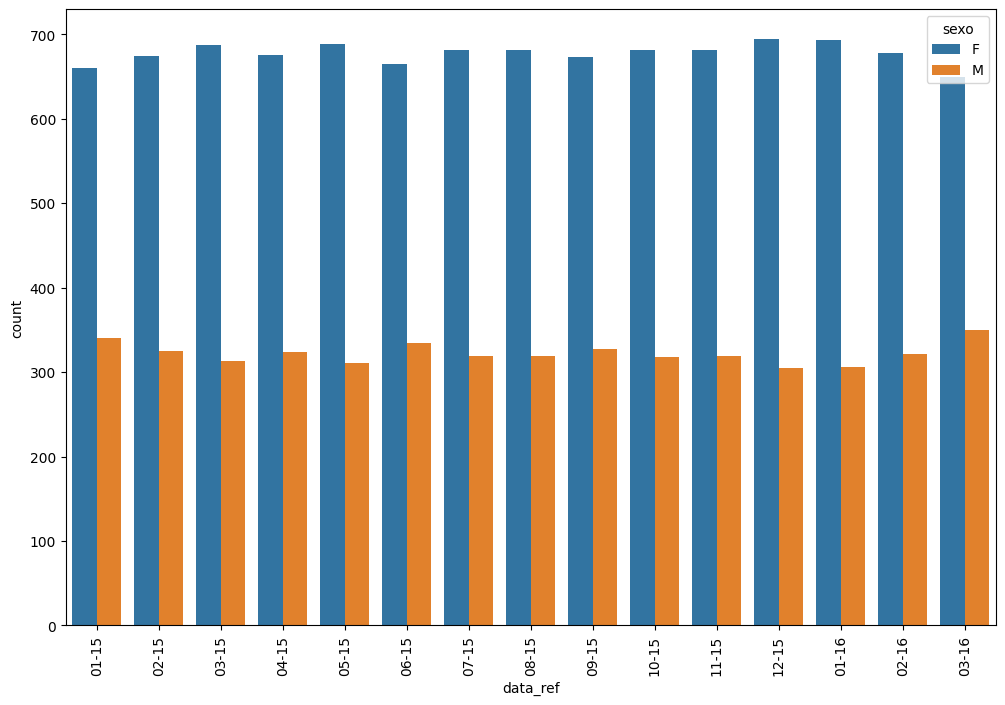

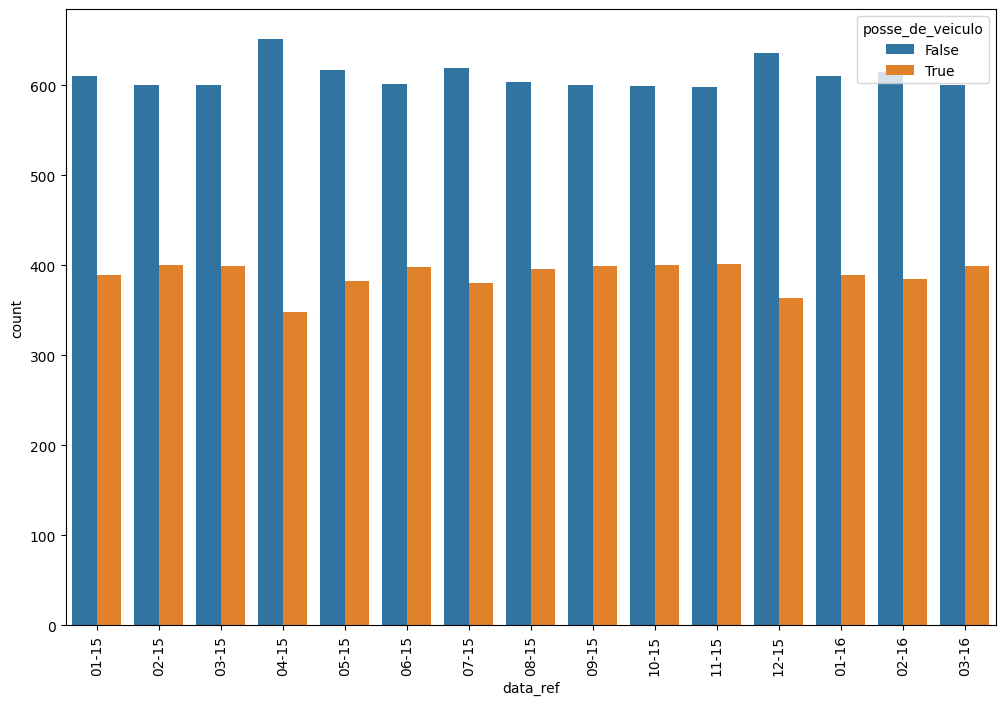

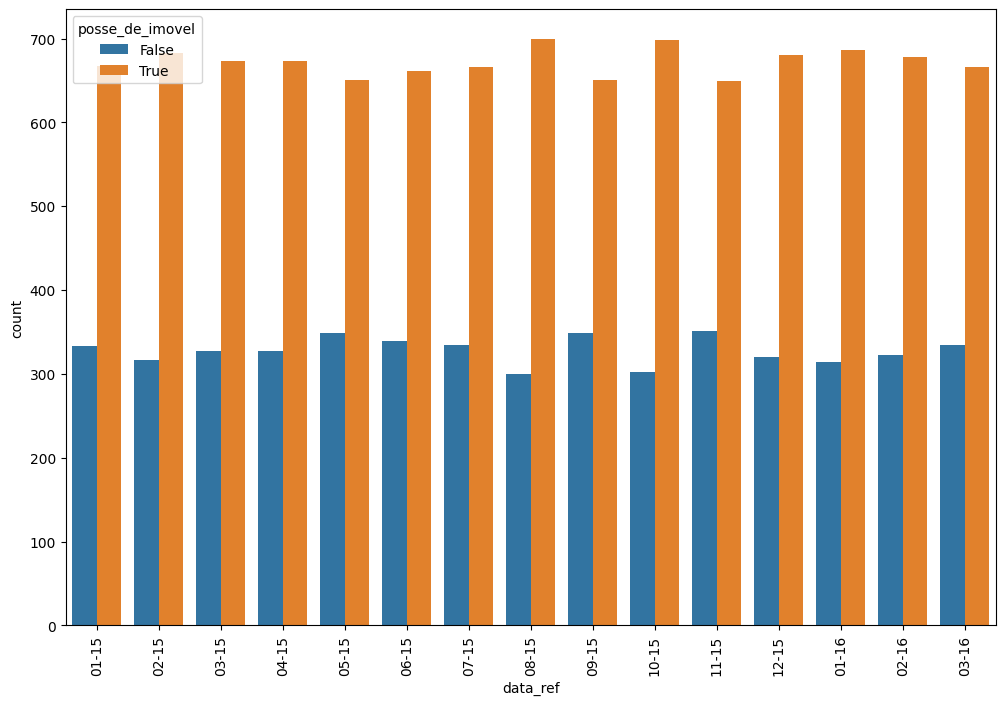

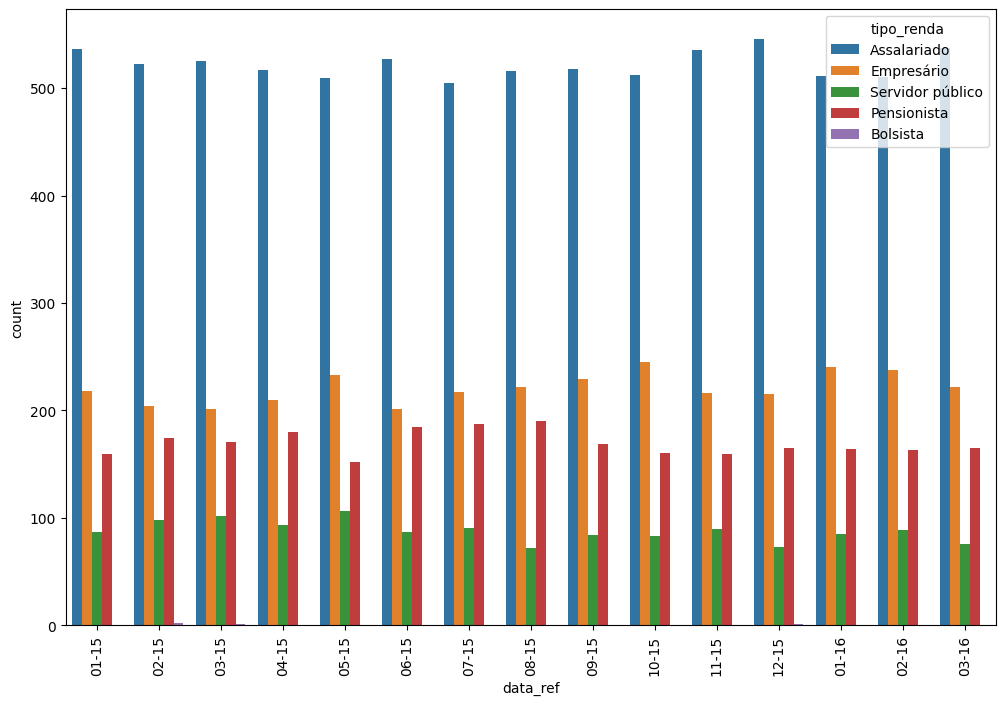

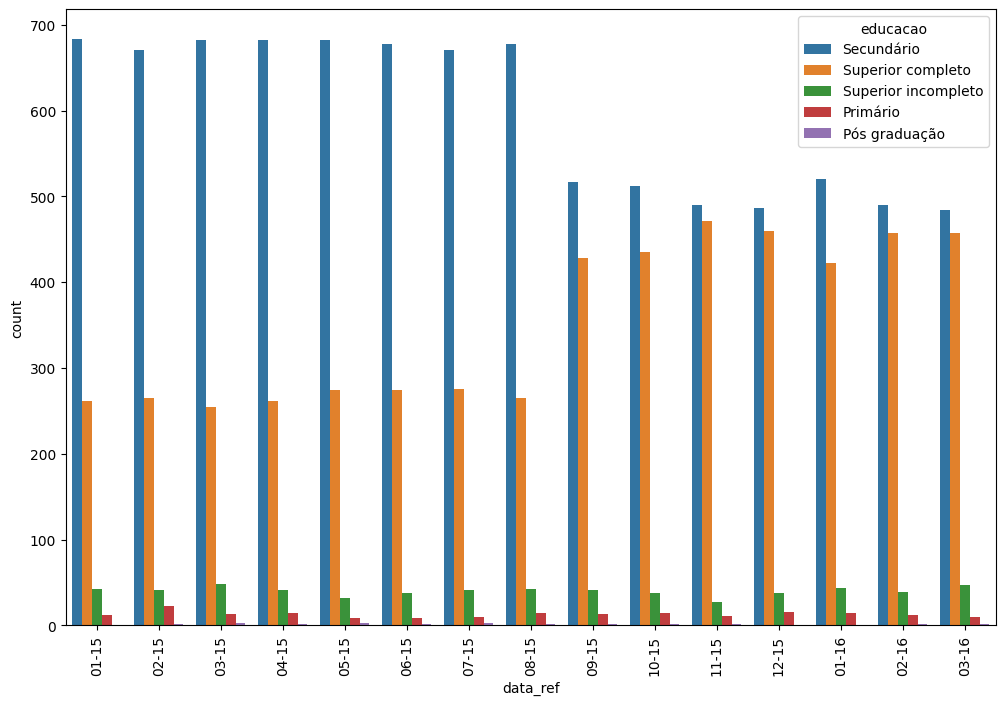

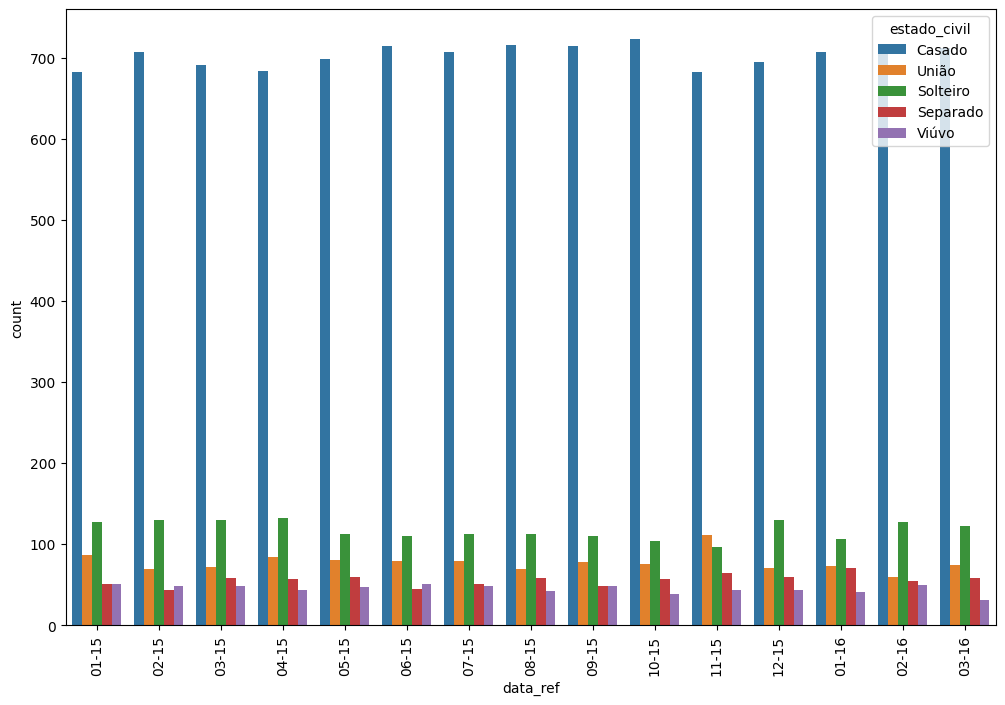

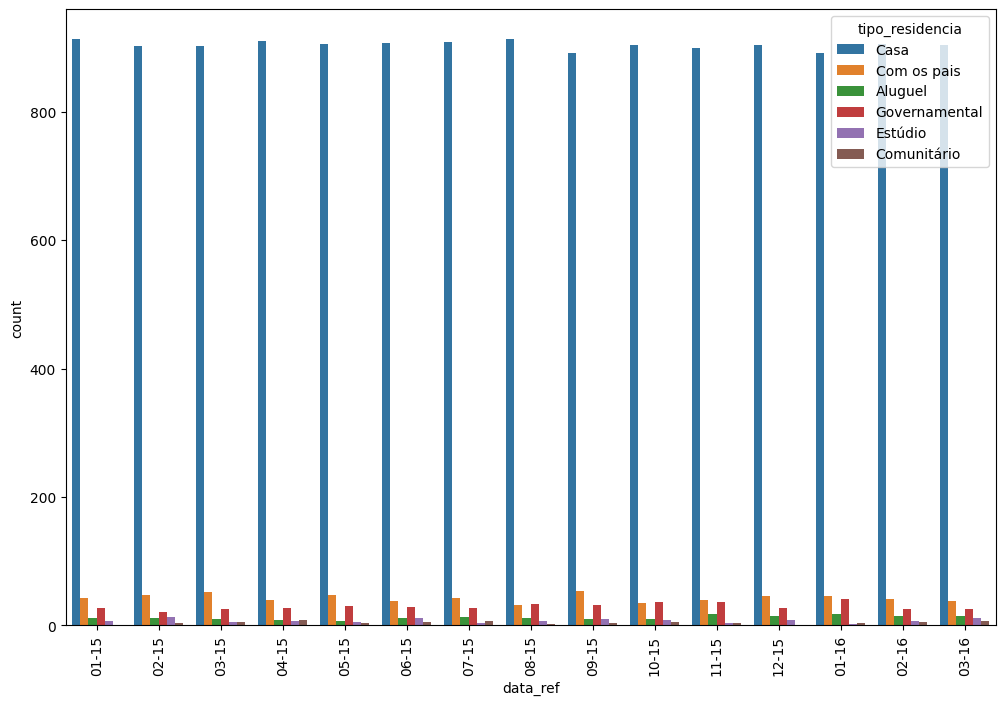

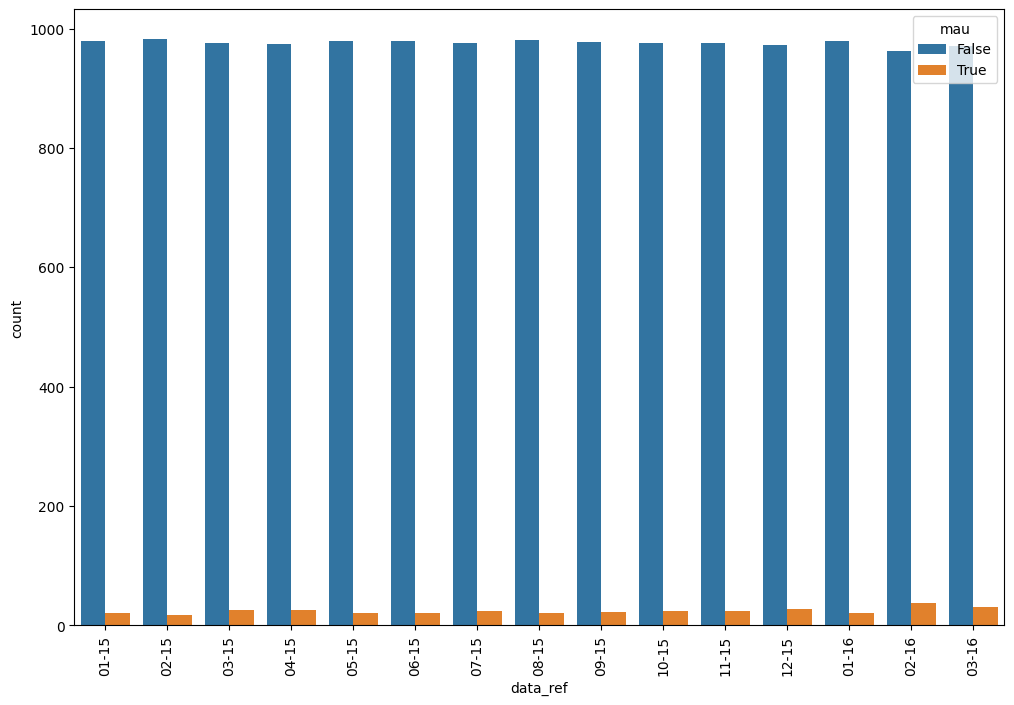

In [4]:
tick_labs = df_qualitativa['data_ref'].unique()
variaveis = list(df_qualitativa.columns)
variaveis.remove('data_ref')


for x in variaveis:
    plt.figure(figsize=(12,8))
    grafico = grafico = sns.countplot(x='data_ref',hue=x, data=df_qualitativa)
    ticks = grafico.set_xticks(list(range(df_qualitativa['data_ref'].nunique())))
    labels = grafico.set_xticklabels(tick_labs, rotation=90)
    plt.show()

### **INSIGHT:** A única mudança observada foi uma diminuição no ensino secundário a partir do mês de agosto, enquanto o número de pessoas com ensino superior completo aumentou.

2) Para cada variável quantitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [5]:
df_quantitativa = df.copy()
df_quantitativa = df_quantitativa.select_dtypes(exclude=['object','bool'])
df_quantitativa = df_quantitativa.drop(columns=['Unnamed: 0','index'])
df_quantitativa['data_ref'] = df['data_ref']

df_quantitativa

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref
0,1,36,3.575342,3.0,3369.24,2015-01-01
1,0,42,0.860274,2.0,6096.14,2015-01-01
2,2,31,8.065753,4.0,5658.98,2015-01-01
3,0,50,1.208219,2.0,7246.69,2015-01-01
4,0,52,13.873973,2.0,4017.37,2015-01-01
...,...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29,2016-03-01
14996,1,30,12.079452,3.0,2519.18,2016-03-01
14997,0,40,2.161644,2.0,1586.85,2016-03-01
14998,0,47,3.295890,2.0,6975.39,2016-03-01


In [6]:
df_quantitativa['data_ref'] = pd.to_datetime(df_quantitativa['data_ref'])
df_quantitativa['data_ref'] = df_quantitativa['data_ref'].dt.strftime('%m-%y')
df_quantitativa

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,data_ref
0,1,36,3.575342,3.0,3369.24,01-15
1,0,42,0.860274,2.0,6096.14,01-15
2,2,31,8.065753,4.0,5658.98,01-15
3,0,50,1.208219,2.0,7246.69,01-15
4,0,52,13.873973,2.0,4017.37,01-15
...,...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29,03-16
14996,1,30,12.079452,3.0,2519.18,03-16
14997,0,40,2.161644,2.0,1586.85,03-16
14998,0,47,3.295890,2.0,6975.39,03-16


In [7]:
df_quantitativa_media = df_quantitativa.groupby('data_ref').mean()
df_quantitativa_media

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,
01-15,0.431,43.794,7.677761,2.201,4606.01071
01-16,0.456,43.522,8.045047,2.237,4528.53547
02-15,0.438,44.109,7.688772,2.217,4672.76708
02-16,0.411,43.938,7.646000,2.184,4842.65967
03-15,0.408,43.657,7.826948,2.173,4616.11109
03-16,0.460,43.584,7.909992,2.246,5005.60638
04-15,0.428,43.534,7.750912,2.198,4578.24089
05-15,0.394,43.935,8.087878,2.174,4631.34791
06-15,0.435,44.296,7.745659,2.227,4655.06673


C:\Users\lifem\AppData\Local\Temp\ipykernel_5896\1536947027.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = grafico.set_xticklabels(tick_labs, rotation=90)


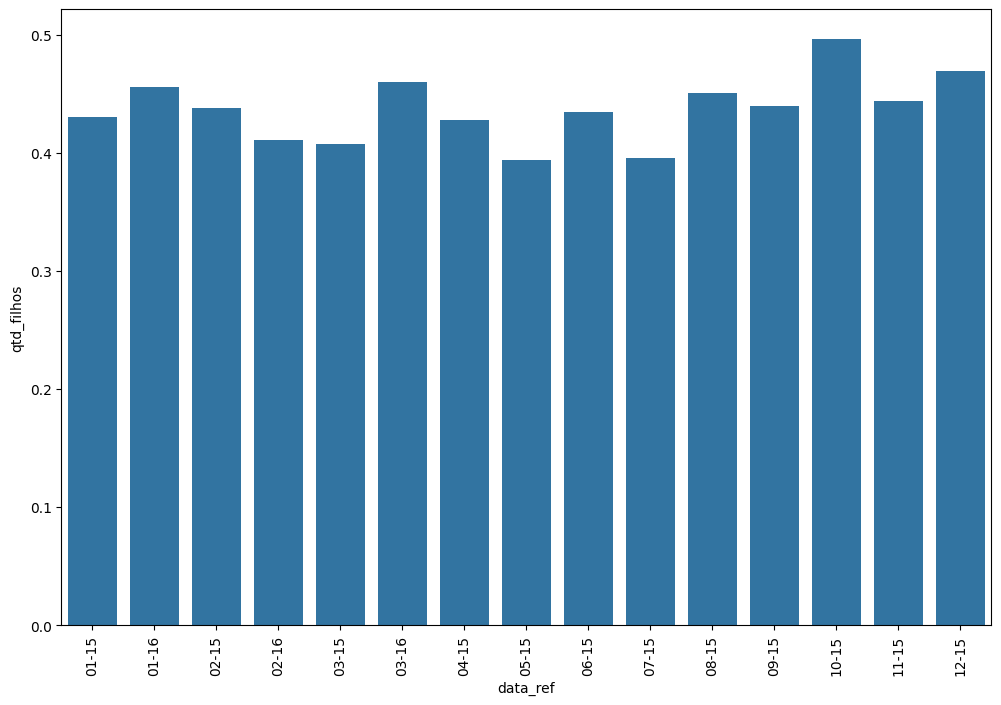

C:\Users\lifem\AppData\Local\Temp\ipykernel_5896\1536947027.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = grafico.set_xticklabels(tick_labs, rotation=90)


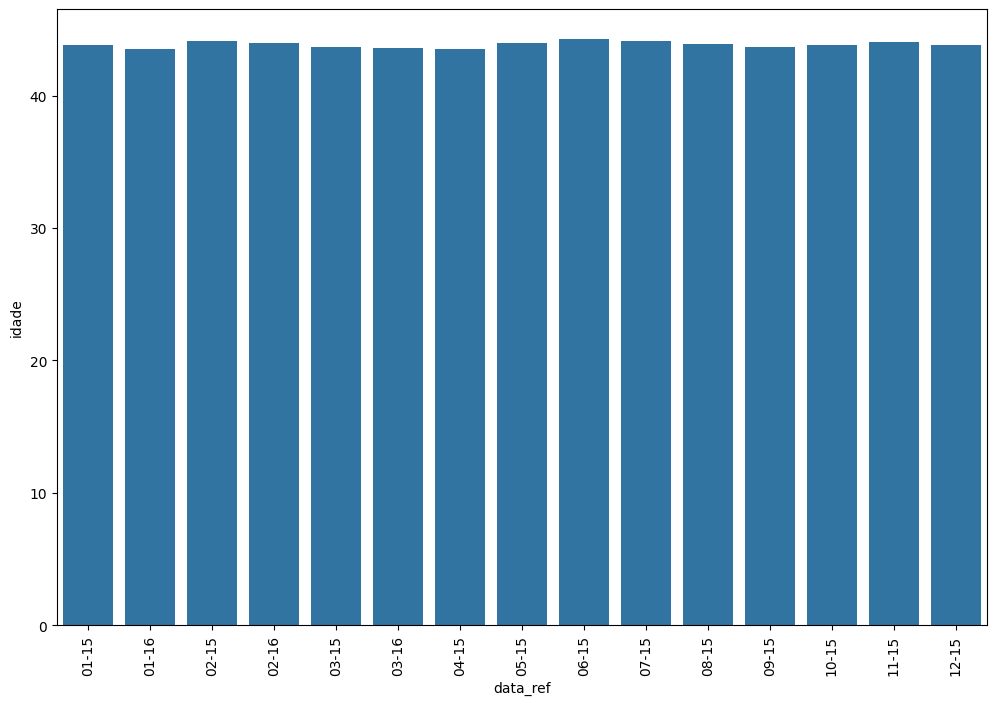

C:\Users\lifem\AppData\Local\Temp\ipykernel_5896\1536947027.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = grafico.set_xticklabels(tick_labs, rotation=90)


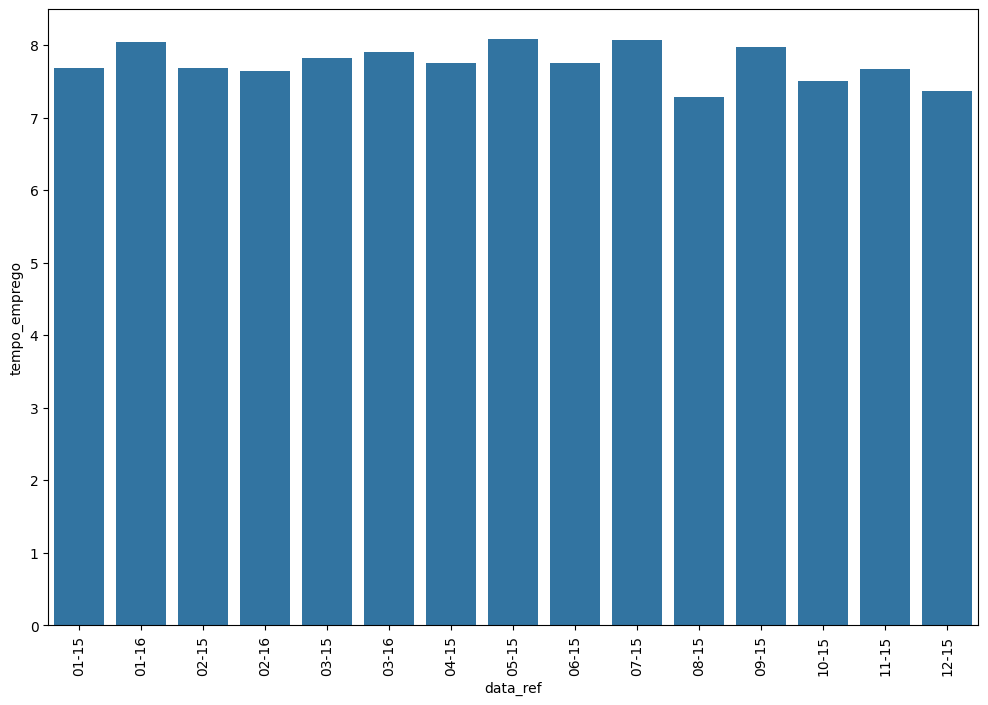

C:\Users\lifem\AppData\Local\Temp\ipykernel_5896\1536947027.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = grafico.set_xticklabels(tick_labs, rotation=90)


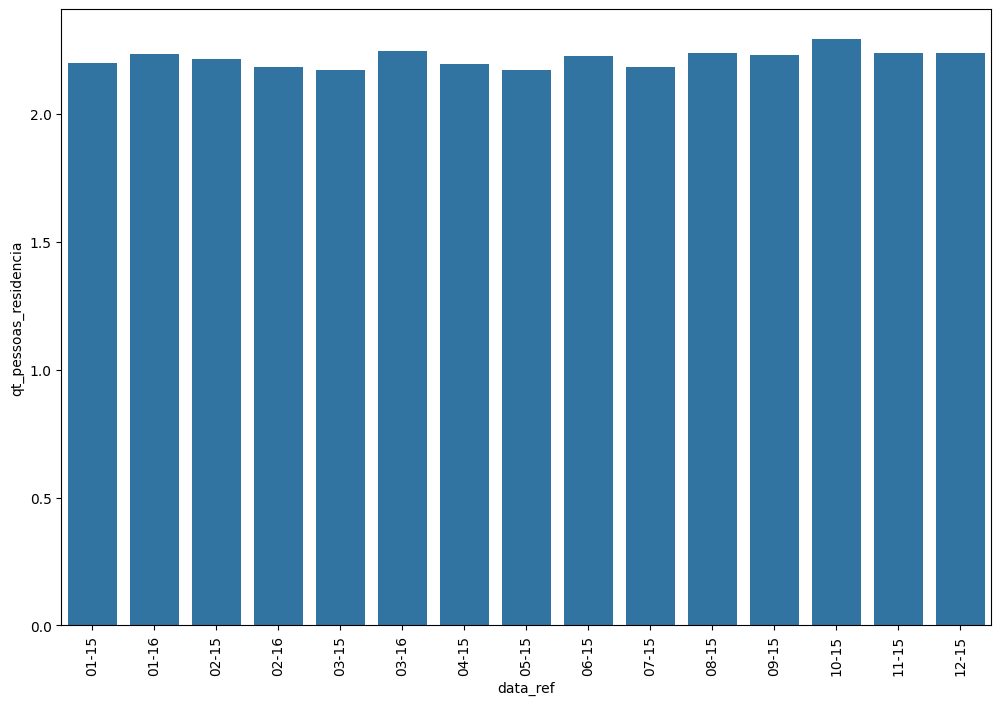

C:\Users\lifem\AppData\Local\Temp\ipykernel_5896\1536947027.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  labels = grafico.set_xticklabels(tick_labs, rotation=90)


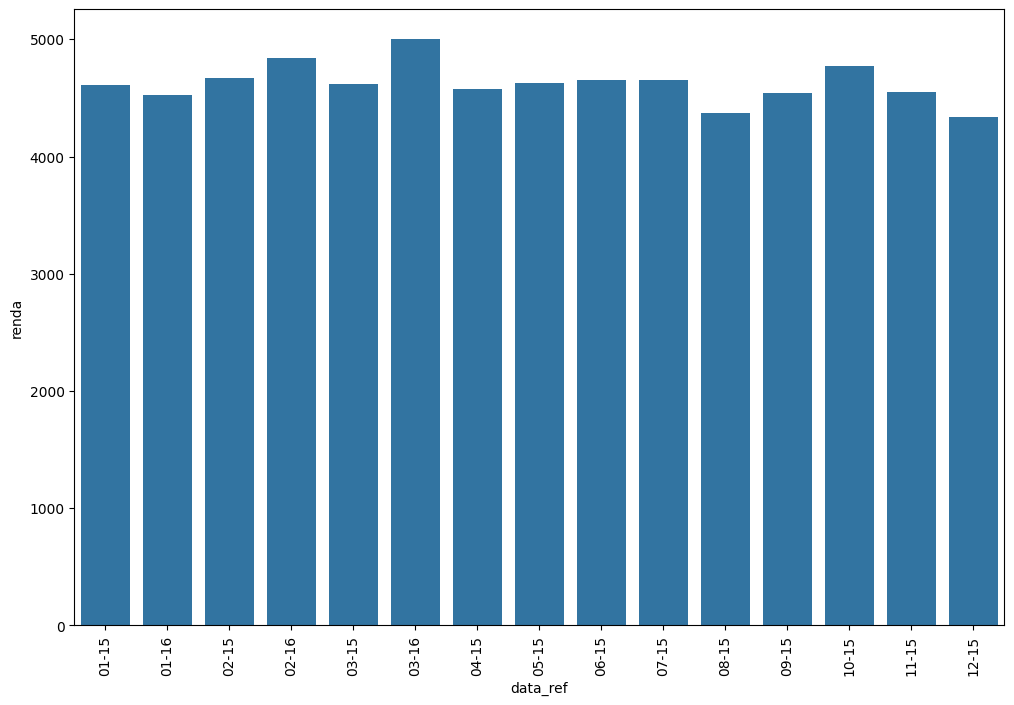

In [8]:
tick_labs = df_quantitativa_media.index
variaveis = list(df_quantitativa_media.columns)


for x in variaveis:
    plt.figure(figsize=(12,8))
    grafico = grafico = sns.barplot(x=df_quantitativa_media.index,y=x, data=df_quantitativa_media,errorbar=('ci', 95))
    
    labels = grafico.set_xticklabels(tick_labs, rotation=90)
    plt.show()

### **INSIGHT:** Os dados mantiveram um padrão consistente do início ao fim, apresentando apenas pequenas variações, o que os torna adequados para utilização em modelagem.